# 5주차 DataFrame
## # 경찰청_연도별 사이버 범죄 통계 현황.csv
- 연도별 사이버 범죄 세부 유형별 발생, 검거 통계
- 2014년도부터 2020년도 자료
- 해킹, 서비스거부, 악성프로그램, 인터넷사기, 사이버금융범죄 등

In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('C:/Users/sj123/Downloads/경찰청_연도별 사이버 범죄 통계.csv')
df.shape

(14, 35)

In [5]:
df.head(3)

,연도,구분,해킹(계정도용),해킹(단순침입),해킹(자료유출),해킹(자료훼손),서비스거부공격,악성프로그램(랜섬웨어),악성프로그램(기타),기타 정보통신망 침해형 범죄,...,사이버 음란물(일반음란물),사이버 음란물(아동음란물),사이버 음란물(불법촬영물유포),사이버 도박(스포츠토토),사이버 도박(경마 경륜 경정),사이버 도박(카지노),사이버 도박(기타),사이버 명예훼손(모욕),사이버 스토킹,기타 불법 컨텐츠
0,2020,발생건수,1067,1621,130,358,25,24,145,974,...,1366,2623,842.0,3222,332,429,1709,19388,42,204
1,2020,검거건수,117,217,46,168,10,0,81,272,...,987,2398,678.0,3154,315,382,1585,12638,39,126
2,2019,발생건수,751,1458,114,341,35,24,246,669,...,1769,756,165.0,3078,366,366,1536,16633,25,251


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   연도                14 non-null     int64  
 1   구분                14 non-null     object 
 2   해킹(계정도용)          14 non-null     int64  
 3   해킹(단순침입)          14 non-null     int64  
 4   해킹(자료유출)          14 non-null     int64  
 5   해킹(자료훼손)          14 non-null     int64  
 6   서비스거부공격           14 non-null     int64  
 7   악성프로그램(랜섬웨어)      14 non-null     int64  
 8   악성프로그램(기타)        14 non-null     int64  
 9   기타 정보통신망 침해형 범죄   14 non-null     int64  
 10  사이버사기(직거래)        14 non-null     int64  
 11  사이버사기(쇼핑몰)        14 non-null     int64  
 12  사이버사기(게임)         14 non-null     int64  
 13  사이버사기(이메일 무역사기)   14 non-null     int64  
 14  사이버사기(기타)         14 non-null     int64  
 15  사이버금융범죄(피싱)       14 non-null     int64  
 16  사이버금융범죄(파밍)       14 non-null     int64  
 17 

## # 칼럼명 변경하기

In [6]:
def column_name(col):
    if '(' in col and ')' in col: # 문자열 col 안에 '(' 와 ')' 가 모두 포함되어 있다
        return col[col.find('(')+1:col.find(')')].strip() # +1 : 괄호 제외 괄호 안 첫 글자부터 시작해서 괄호까지 슬라이싱
    else:
        return col.strip() # 괄호 없을 때 그냥 컬럼 전체를 리턴 (앞뒤 공백만 제거)

df.columns = [column_name(col) for col in df.columns]
df.columns

Index(['연도', '구분', '계정도용', '단순침입', '자료유출', '자료훼손', '서비스거부공격', '랜섬웨어', '기타',
       '기타 정보통신망 침해형 범죄', '직거래', '쇼핑몰', '게임', '이메일 무역사기', '기타', '피싱', '파밍',
       '스미싱', '메모리해킹', '몸캠피싱', '메신저이용사기', '기타', '개인위치정보 침해', '사이버저작권침해',
       '기타 정보통신망 이용형 범죄', '일반음란물', '아동음란물', '불법촬영물유포', '스포츠토토', '경마 경륜 경정',
       '카지노', '기타', '모욕', '사이버 스토킹', '기타 불법 컨텐츠'],
      dtype='object')

In [7]:
etc = [col for col in df.columns if col == '기타']
df['기타'] = df[etc].sum(axis=1)
df.drop(columns=etc, inplace=True)
print(df.shape)
print(df.columns)

(14, 31)
Index(['연도', '구분', '계정도용', '단순침입', '자료유출', '자료훼손', '서비스거부공격', '랜섬웨어',
       '기타 정보통신망 침해형 범죄', '직거래', '쇼핑몰', '게임', '이메일 무역사기', '피싱', '파밍', '스미싱',
       '메모리해킹', '몸캠피싱', '메신저이용사기', '개인위치정보 침해', '사이버저작권침해', '기타 정보통신망 이용형 범죄',
       '일반음란물', '아동음란물', '불법촬영물유포', '스포츠토토', '경마 경륜 경정', '카지노', '모욕',
       '사이버 스토킹', '기타 불법 컨텐츠'],
      dtype='object')


## # 데이터 준비
- 발생/ 검거 분리
- 분석에 사용할 컬럼만 추출(총합, 연도, 구분 제외)

In [8]:
발생 = df[df['구분'] == '발생건수'].copy()
검거 = df[df['구분'] == '검거건수'].copy()

범죄항목 = [col for col in 발생.columns if col not in ['연도', '구분', '총합']]

# #1.  연도별 사이버 범죄 총 발생건수 
- 연도별 사이버 범죄의 증감

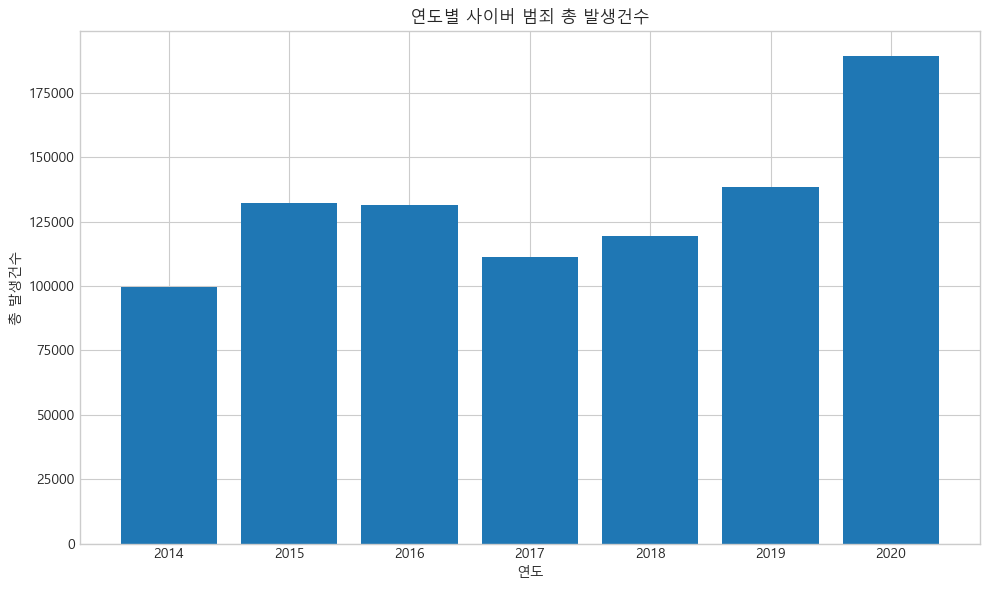

In [9]:
# 연도별 총 발생건수 시각
발생['총합'] = 발생[범죄항목].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.bar(발생['연도'], 발생['총합'])
plt.title('연도별 사이버 범죄 총 발생건수')
plt.xlabel('연도')
plt.ylabel('총 발생건수')
plt.grid(True)
plt.tight_layout()
plt.show()

# #2. 연도별 총 발생건수 시각화

In [10]:
검거['총합'] = 검거[범죄항목].sum(axis=1)
검거율 = (검거['총합'].values / 발생['총합'].values * 100).round(2)

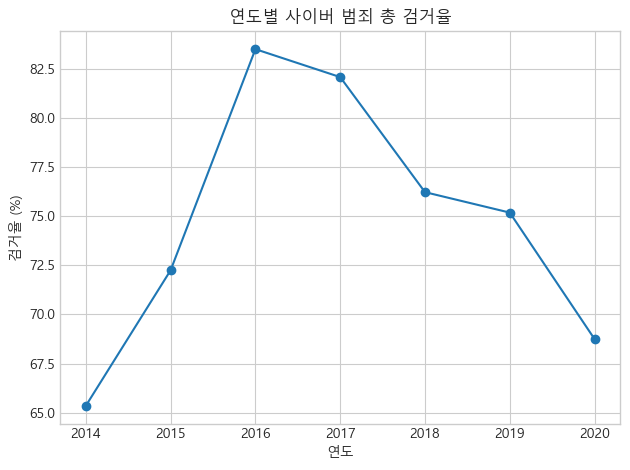

In [11]:
plt.plot(발생['연도'], 검거율, marker='o')
plt.title('연도별 사이버 범죄 총 검거율')
plt.xlabel('연도')
plt.ylabel('검거율 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# #3. 연도별 총 발생건수 & 총 검거건수 비교
- 검거율 DataFrame 생성
- merge로 하나로 합쳐서 검거율까지 같이 분석

In [12]:
발생연도별 = 발생[['연도']].copy()
발생연도별['총발생'] = 발생[범죄항목].sum(axis=1)

검거연도별 = 검거[['연도']].copy()
검거연도별['총검거'] = 검거[범죄항목].sum(axis=1)

연도별_합 = pd.merge(발생연도별, 검거연도별, on='연도')
연도별_합['검거율'] = (연도별_합['총검거'] / 연도별_합['총발생']) * 100
display(연도별_합)

,연도,총발생,총검거,검거율
0,2020,189451.0,130241.0,68.746536
1,2019,138567.0,104173.0,75.178794
2,2018,119283.0,90913.0,76.216225
3,2017,111307.0,91346.0,82.066716
4,2016,131368.0,109678.0,83.489130
5,2015,132141.0,95476.0,72.253124
6,2014,99590.0,65096.0,65.363992


# #4. 범죄유형별 총 발생/검거 건수 및 격차 계산

In [13]:
발생_합 = 발생[범죄항목].sum()
검거_합 = 검거[범죄항목].sum()

비교 = pd.DataFrame({
    '발생건수': 발생_합,
    '검거건수': 검거_합
})
비교['검거_격차'] = 비교['발생건수'] - 비교['검거건수']

# #5. 검거 격차 큰 범죄 TOP10 시각화

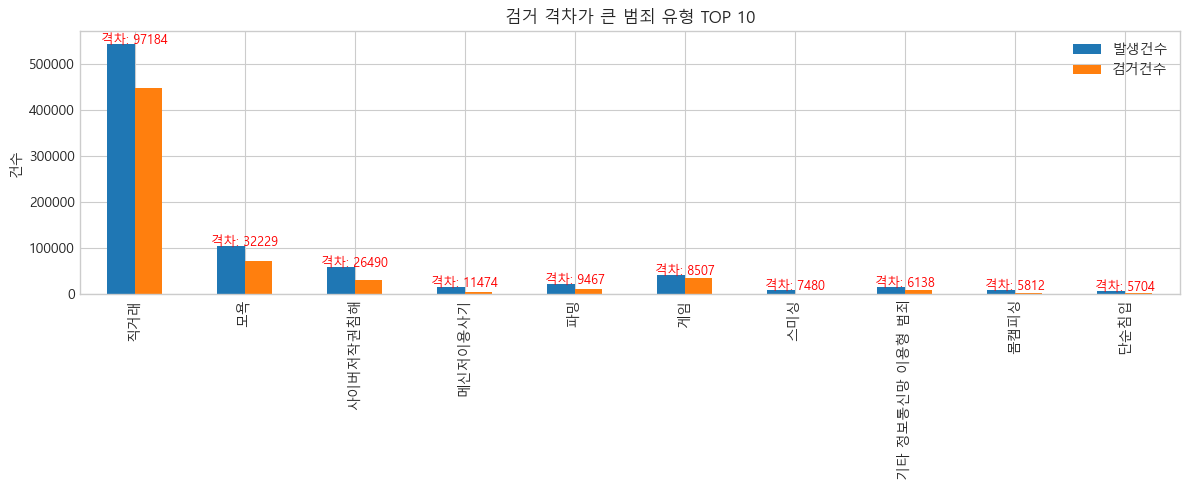

In [15]:
top_gap = 비교.sort_values(by='검거_격차', ascending=False).head(10)

ax = top_gap[['발생건수', '검거건수']].plot(
    kind='bar', figsize=(12, 5),
    title='검거 격차가 큰 범죄 유형 TOP 10',
    ylabel='건수'
)

for i, 격차 in enumerate(top_gap['검거_격차']):
    ax.text(i, top_gap['발생건수'].iloc[i] + 100, f"격차: {int(격차)}", 
            ha='center', fontsize=9, color='red')

plt.grid(True)
plt.tight_layout()
plt.show()

# #6. 해킹범죄 연도별 발생건수 기준 area chart

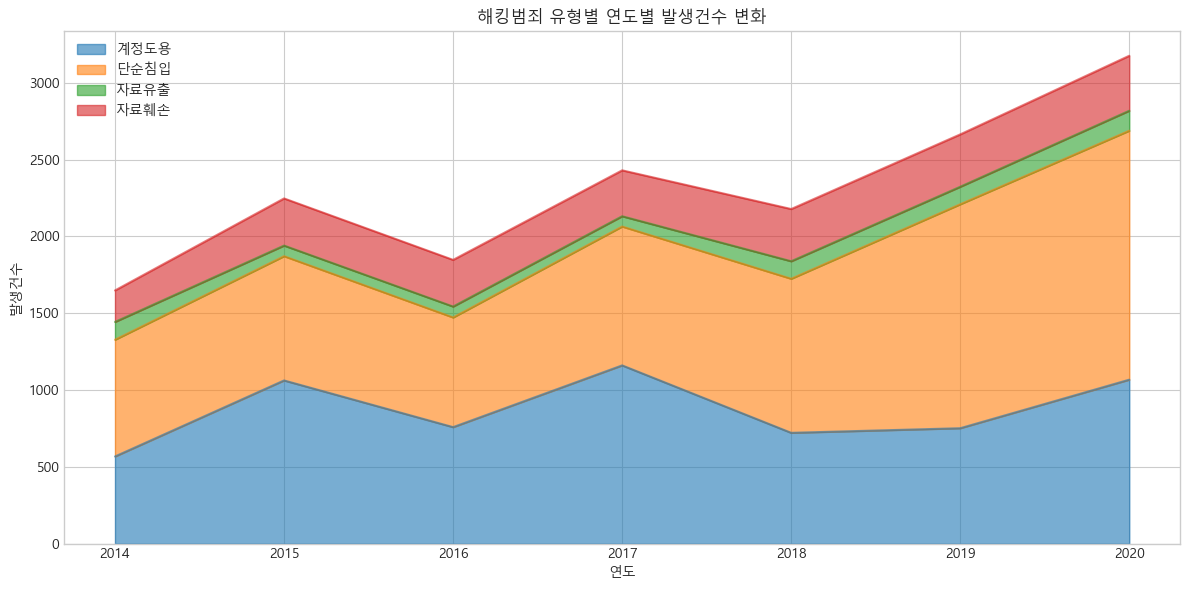

In [19]:
# 발생건수 기준
해킹범죄 = ['계정도용', '단순침입', '자료유출', '자료훼손']
해킹발생 = 발생[['연도'] + 해킹범죄].copy()
해킹발생 = 해킹발생.sort_values(by='연도').set_index('연도')


해킹발생.plot.area(
    figsize=(12, 6),
    title='해킹범죄 유형별 연도별 발생건수 변화',
    alpha=0.6)
plt.ylabel('발생건수')
plt.xlabel('연도')
plt.grid(True)
plt.tight_layout()
plt.show()

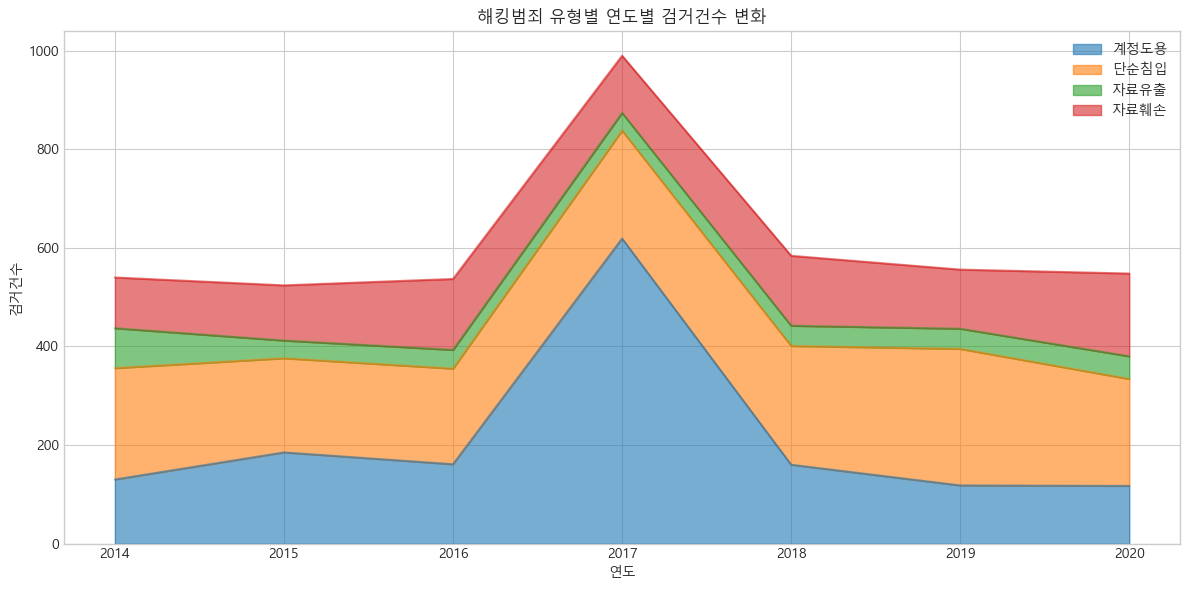

In [18]:
# 검거건수 기준
해킹범죄 = ['계정도용', '단순침입', '자료유출', '자료훼손']
해킹검거 = 검거[['연도'] + 해킹범죄].copy()
해킹검거 = 해킹검거.sort_values(by='연도').set_index('연도')


해킹검거.plot.area(
    figsize=(12, 6),
    title='해킹범죄 유형별 연도별 검거건수 변화',
    alpha=0.6)
plt.ylabel('검거건수')
plt.xlabel('연도')
plt.grid(True)
plt.tight_layout()
plt.show()